# Simple Linear Regression


[Acknowledgments Page](https://ds100.org/fa23/acks/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
#from plotly.subplots import make_subplots
import plotly.graph_objects as go
rng = np.random.default_rng()

In [2]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# I).  Simple Linear Regression


### Standard Units

$$
\text{StandardUnits}(x) = \frac{x - \text{Mean}(x)}{\text{Stdev}(x)} 
$$

In [ ]:
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

### Correlation

$$
\begin{align}
r 
& = \text{Mean}\left(\text{StandardUnits}(x) *  \text{StandardUnits}(y)\right)\\
& = \frac{1}{n} \sum_{i=1}^n \text{StandardUnits}(x_i) *  \text{StandardUnits}(y_i)\\
& = \frac{1}{n}\sum_{i=1}^n \left( \frac{x_i - \text{Mean}(x)}{\text{Stdev}(x)} \right) * \left( \frac{y_i - \text{Mean}(y)}{\text{Stdev}(y)} \right) \\
\end{align}
$$

In [ ]:
def correlation(x, y):
    """Computes the correlation between arrays x and y"""
    x_su = standard_units(x)
    y_su = standard_units(y)
    return np.mean(x_su * y_su)

### Example:  Predicting children's (adult) heights from heights of their parents

Can we predict how tall a child will grow based on the height of their parents?

To do this we will use the famous Galton's height dataset (https://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf) that was collected to demonstrate the connection between parent's heights and the height of their (adult) children.  The data were collected in the late 19th century in England. He coined the term regression towards mediocrity to describe the result of his linear model. (Note that the paper was written in 1886. The “computer” mentioned in the paper was actually a person whose job was to do number crunching.) Surprisingly, Galton’s analysis is still useful today (see e.g. Predicting height: the Victorian approach beats modern genomics (https://www.wired.com/2009/03/predicting-height-the-victorian-approach-beats-modern-genomics/)

Sir Francis Galton (1822–1911) was an English statistician. He founded many concepts in statistics, such as correlation, quartile, percentile and regression, that are still being used today.

The description of the data can be found here:  https://ytliu0.github.io/Stat390EF-R-Independent-Study-archive/RMarkdownExercises/GaltonData.html

(Heights are given in inches in this table)

In [ ]:
heights = pd.read_csv("data/family_heights.csv")


heights["parent ave height (in)"] = (heights["father"]+heights["mother"])/2

heights.head()

In [ ]:
px.scatter(heights, x="parent ave height (in)", y="child")

In [ ]:
correlation(heights["parent ave height (in)"], heights["child"])

## Finding the "best fit" line for this data

In [ ]:
guess_slope=1
guess_intercept=-.5

guess_slope2=.66
guess_intercept2=22

guess_slope3= .71
guess_intercept3= 20

fig = px.scatter(heights, x="parent ave height (in)", y="child")
xtest = np.arange(62, 73, 0.5)
fig.add_scatter(x=xtest, 
                y=guess_slope * xtest + guess_intercept,
                name = f"{np.round(guess_slope, 2)} x + {(guess_intercept)}")

fig.add_scatter(x=xtest, 
                y=guess_slope2 * xtest + guess_intercept2,
                name = f"{np.round(guess_slope2, 2)} x + {(guess_intercept2)}")

fig.add_scatter(x=xtest, 
                y=guess_slope3 * xtest + guess_intercept3,
                name = f"{np.round(guess_slope3, 2)} x + {(guess_intercept3)}")

fig

## Computing the Error (aka Residual)

The error (also called the residual) is the difference between the actual and predicted value:

$$
\text{residual = error} = y - y_\text{predicted}
$$


In [ ]:
#fig = px.scatter(heights, x="parent ave", y="child")
#xtest = np.arange(62, 73, 0.5)
#fig.add_scatter(x=xtest, 
                #y=guess_slope * xtest + guess_intercept,
                #name = f"{np.round(guess_slope, 2)} x + {np.round(guess_intercept)}")

y = heights["child"]
guess_slope = 1
guess_intercept=-.5

predicted=guess_slope *heights["parent ave height (in)"] + guess_intercept

errors = y - predicted
print ("MSE", np.mean(errors ** 2))

fig = px.scatter(heights, x="parent ave height (in)", y="child")
xtest = np.arange(62, 75, 1)
fig.add_scatter(x=xtest, 
                y=guess_slope * xtest + guess_intercept,
                name = f"{np.round(guess_slope, 2)} x + {np.round(guess_intercept)}")
fig.add_scatter(x=heights["parent ave height (in)"].repeat(3), 
                y=np.ravel(np.vstack([y, predicted, np.nan * predicted]).T),
                marker_color="gray", line_width=0.75, name="residuals")
fig

<br>

---

## Mean Squared Error as Function of our Model (Line)

In [ ]:
def height_mse(slope, intercept):
    predicted = slope * heights["parent ave height (in)"] + intercept 
    actual = heights["child"]
    errors = predicted - actual
    mse = np.mean(errors ** 2)
    return mse

In [ ]:
pip install datascience

In [ ]:
from datascience import *


demo_slope = 0.664495262353   #We'll show where this comes from below
demo_intercept = 22.4618399558  #We'll show where this comes from below


alt_slopes = demo_slope + np.arange(-2, 2, .1)
alt_intercepts = demo_intercept + np.arange(-20, 20, 1)
variations = Table(["Slope", "Intercept", "MSE"])
for new_slope in alt_slopes:
    for new_intercept in alt_intercepts:
        mse = height_mse(new_slope, new_intercept)
        variations.append([new_slope, new_intercept, mse])
    
variations
go.Figure(data=[
    go.Contour(x=variations.column("Slope"), y=variations.column("Intercept"), z=variations.column("MSE")), 
    go.Scatter(x=[demo_slope], y=[demo_intercept], marker_color="red")
],
layout=dict(width = 800,height=600, xaxis_title="Slope", yaxis_title="Intercept"))

In [ ]:
go.Figure(data=[
    go.Surface(x = alt_slopes, y = alt_intercepts,
               z=variations.column("MSE").reshape(len(alt_slopes), len(alt_intercepts)).T),
    go.Scatter3d(x=[demo_slope], y=[demo_intercept], z=[height_mse(demo_slope, demo_intercept)])], 
          layout=dict(height=1000, 
                      scene_xaxis_title="Slope", scene_yaxis_title="Intercept", 
                      scene_zaxis_title="MSE"))

We want to find the value that minimizes the MSE!

### Optimal Slope and Intercept for SLR
(We derive these results in the Appendix of the slides using Calculus):

$$
\begin{align}
\text{slope} &= r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)}\\
\text{intercept} & = \text{Mean}(y) - \text{slope} * \text{Mean}(x)
\end{align}
$$

(where $r$ is the correlation between x and y)

In [ ]:
def slope(x, y):
    """Computes the slope of the regression line"""
    r = correlation(x, y)
    y_sd = np.std(y)
    x_sd = np.std(x)
    return r * y_sd / x_sd

In [ ]:
def intercept(x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return y_mean - slope(x, y)*x_mean

In [ ]:
def fit_least_squares(x, y):
    return intercept(x,y), slope(x,y)

### Linear Prediction at points in the original model

$$
\hat{y}_\text{predicted} = \text{slope} * x + \text{intercept}
$$


In [ ]:
def predict_linear(x, y):
    """Return an array of the regressions estimates at all the x values"""
    pred_y = slope(x, y) * x + intercept(x, y)
    return pred_y

### Linear Prediction at a point not in the original model:

In [ ]:
def predict_linear_new(x, y, new):
    """Return an array of the regressions estimates at all the x values"""
    pred_new = slope(x, y) * new + intercept(x, y)
    return pred_new

### Visualizing the SLR

In [ ]:


def visual_SLR(x,y):
    
    yhat_pred = predict_linear(x,y)
    sns.scatterplot(x=x, y=y)
    plt.plot(x, yhat_pred, color='red', lw=4)

    plt.title("Regression Line:  y_pred = "+str(round(intercept(x,y),2))+"+"+str(round(slope(x,y),2))+"x")
%matplotlib inline

In [ ]:
visual_SLR(heights["parent ave height (in)"], heights["child"]);

In [ ]:
predict_linear_new(heights["parent ave height (in)"], heights["child"], 70.5)

## Calculating Least Squares Regression Line Using Built-In Python Functions:
`sklearn` is a popular Python library for building and fitting models. Below we walk through the general workflow for writing code for sklearn. While our examples will be focused on linear models, sklearn is highly adaptable for use on other (more complex) kinds of models. We'll see examples of this later in the semester.

In [ ]:
import sklearn.linear_model as lm

# Step 1: initialize LinearRegression model
my_model = lm.LinearRegression()

# Step 2: fit the model
X = heights[["parent ave height (in)"]]  #Needs to be a dataframe, so if only have one column include 2 brackets
y = heights["child"]

my_model.fit(X, y)

# Step 3: make predictions

print("The model intercept is",my_model.intercept_)
print("The model slope is:", my_model.coef_[0])

y_hat = my_model.predict(X)

print(y_hat[:5])

print(f"The MSE of the model is {np.mean((y-y_hat)**2)}")


In [ ]:
#Plotting Model Using output from Sklearn


demo_slope = my_model.coef_[0]
demo_intercept = my_model.intercept_

fig = px.scatter(heights, x="parent ave height (in)", y="child")
xtest = np.arange(62, 75, .5)
fig.add_scatter(x=xtest, 
                y=demo_slope * xtest + demo_intercept,
                name = f"{np.round(demo_slope, 2)} x + {np.round(demo_intercept)}")




In [ ]:
my_model.predict([[70.5]])

## Evaluating the SLR Model:

### 1a. Calculate RMSE:
A lower RMSE indicates more "accurate" predictions (lower "average loss" across data)


In [ ]:
print(f"The RMSE of the model is {np.sqrt(np.mean((y-y_hat)**2))}")

### 1b.  Calculate $r^2$  (for SLR models):       

$r^2$ ranges from 0 to 1 and is effectively
“the proportion of variance in the data that the model explains.”


In [ ]:
np.var(y_hat)/np.var(y)

In [ ]:

print ("Correlation squared is", correlation(heights["parent ave height (in)"], heights["child"])**2)

### 2. Plot Residuals

One way we visually evaluate the model is to plot the residuals vs either: 

 - the predicted y-value. 
 - the x-value 

A good residual plot shows no pattern.

A good residual plot also has a similar vertical spread throughout the entire plot. Else (called heteroscedasticity), the accuracy of the predictions is not reliable.


In [ ]:
px.scatter(heights, x="parent ave height (in)", y=y-y_hat,labels=dict(x="Parent Ave Height (in)", y="Residual"))

In [ ]:
px.scatter(heights, x=y_hat, y=y-y_hat, labels=dict(x="Predicted Child Height (in)", y="Residual"))



### Plot Data vs Model (usually not possible when using more predictors)

In [ ]:
fig = px.scatter(heights, x="parent ave height (in)", y="child")
xtest = np.arange(62, 75, .5)
fig.add_scatter(x=xtest, 
                y=demo_slope * xtest + demo_intercept,
                name = f"{np.round(demo_slope, 2)} x + {np.round(demo_intercept)}")


## II).  Evaluating/Comparing Linear Models

In [3]:
# Helper functions
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

def fit_least_squares(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1*x

def compute_mse(y, yhat):
    return np.mean((y - yhat)**2)

def mse_constant(theta, data):
    return np.mean(np.array([(y_obs - theta) ** 2 for y_obs in data]), axis=0)

In [ ]:
plt.style.use('default') # Revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize=NO_VIZ):
    # statistics
    print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
    print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
    print(f"r = Correlation(x, y): {correlation(x, y):.3f}")
    
    # Performance metrics
    ahat, bhat = fit_least_squares(x, y)
    yhat = predict(x, ahat, bhat)
    print(f"\theta_0: {ahat:.2f}, \theta_1: {bhat:.2f}")
    print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")

    # visualization
    fig, ax_resid = None, None
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1,2,figsize=(8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        ax_resid = axs[1]
    elif visualize == RESID:
        fig = plt.figure(figsize=(4, 3))
        ax_resid = plt.gca()
    
    if ax_resid is not None:
        ax_resid.scatter(x, y - yhat, color = 'red')
        ax_resid.plot([4, 14], [0, 0], color = 'black')
        ax_resid.set_title("Residuals")
    
    return fig

Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

In [ ]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

anscombe = {
    'I': pd.DataFrame(list(zip(x, y1)), columns =['x', 'y']),
    'II': pd.DataFrame(list(zip(x, y2)), columns =['x', 'y']),
    'III': pd.DataFrame(list(zip(x, y3)), columns =['x', 'y']),
    'IV': pd.DataFrame(list(zip(x4, y4)), columns =['x', 'y'])
}

In [ ]:
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    x, y = ans["x"], ans["y"]
    ahat, bhat = fit_least_squares(x, y)
    print(f"Dataset {dataset}: theta_0: {ahat:.2f}, theta_1: {bhat:.2f}")

Looks like all four datasets have exactly the same fit. 

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

In [ ]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = NO_VIZ)
    print()
    print()

However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    axs[i//2, i%2].scatter(ans['x'], ans['y'])
    axs[i//2, i%2].set_title(f"Dataset {dataset}")

plt.show()

Checking the residuals will also shed light on the differences among these four datasets.

In general the residual plot of a good regression shows no pattern.

In [ ]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = RESID)
    plt.show(fig)
    print()
    print()

The takeaway here is that you should always visualize your datasets before fitting any models to it!

---
<br/>



## III).  Dugongs: Comparing Two Different Models, Both Fit with MSE

In [ ]:
dugongs = pd.read_csv("data/dugongs.csv")
dugongs.head()

In [ ]:
data_constant = dugongs["Age"]
data_linear = dugongs[["Length", "Age"]]

### Loss Surfaces

### CONSTANT MODEL:  
Computes constant loss surface. As a reminder, the average loss of the constant model is

$$
\Large
\hat{R}(\theta_0) = \frac{1}{n}\sum_{i=1}^n (y_i - \theta_0)^2
$$

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

thetas = np.linspace(-20, 42, 1000)
l2_loss_thetas = mse_constant(thetas, data_constant)

plt.plot(thetas, l2_loss_thetas)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'MSE')

# Optimal point:  The mean:
thetahat = np.mean(data_constant)
plt.scatter([thetahat], [mse_constant(thetahat, data_constant)], s=50, label = r"$\hat{\theta}_0$")
plt.legend()
# plt.savefig('mse_constant_loss.png', bbox_inches = 'tight');
plt.show()

### Visualization of Constant Model

Here's a visualization of the prediction for the Constant Model:

In [ ]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

In [ ]:

sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.axvline(thetahat, color='red', lw=4, label=r"$\hat{\theta}_0$");
plt.legend()
plt.yticks([])
# plt.savefig('dugong_rug.png', bbox_inches = 'tight');
plt.show()
print("Constant Model:  Theta_0 =", thetahat)

In [ ]:
#RMSE:
np.sqrt(np.mean((yobs-thetahat)**2))

### SLR MODEL:

In [ ]:
sns.scatterplot(x=xs, y=yobs)

In [ ]:
theta_0_hat, theta_1_hat = fit_least_squares(xs,yobs)

print("SLR intercept is", theta_0_hat)
print("SLR slope is", theta_1_hat)

### Visualizing Loss Surface
Computes 3D loss surface. As a reminder, the average loss for the SLR model is

$$
\Large
\hat{R}(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=1}^n (y_i - (\theta_0 + \theta_1x))^2
$$

In [ ]:
def mse_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([(y - (theta_0+theta_1*x)) ** 2 for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-80, 20, 80)
theta_1_values = np.linspace(-10, 30, 80)
mse_values = np.array([[mse_linear(x,y,data_linear) for x in theta_0_values] for y in theta_1_values])



go.Figure(data=[
    go.Surface(x = theta_1_values, y = theta_0_values,
               z=mse_values),
    go.Scatter3d(x=[theta_1_hat], y=[theta_0_hat], z=[mse_linear(theta_0_hat, theta_1_hat, data_linear)])], 
          layout=dict(height=1000, 
                      scene_xaxis_title="Slope", scene_yaxis_title="Intercept", 
                      scene_zaxis_title="MSE"))

### Predictions

Code to plot the SLR:

In [ ]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

yhats_linear = [theta_0_hat + theta_1_hat * x for x in xs]


In [ ]:

sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.title("Regression Line:  Age = "+str(round(theta_0_hat,2))+"+"+str(round(theta_1_hat,2))+"(Length)")




### RMSE

In [ ]:
print("Least Squares Constant Model RMSE:",
          np.sqrt(mse_constant(thetahat, data_constant)))
print("Least Squares Linear Model RMSE:  ",
          np.sqrt(mse_linear(theta_0_hat, theta_1_hat, data_linear)))

Interpret the RMSE (Root Mean Square Error):
* Constant model error is HIGHER than linear model error
* Linear model is BETTER than constant model (at least for this metric)

## Calculating SLR Using Built-In Python Functions:
`Scikitlearn` (often abbreviated `sklearn`) is a popular Python library for building and fitting models. Below we walk through the general workflow for writing code for sklearn. While our examples will be focused on linear models, sklearn is highly adaptable for use on other (more complex) kinds of models. We'll see examples of this later in the semester.

In [ ]:
import sklearn.linear_model as lm

# Step 1: initialize LinearRegression model
my_model = lm.LinearRegression()


# Step 2: fit the model
X = dugongs[["Length"]]  #Needs to be a dataframe, so if only have one column include 2 brackets
y = dugongs["Age"]

my_model.fit(X, y)

# Step 3: make predictions

print("The model intercept is",my_model.intercept_)
print("The model slope is:", my_model.coef_[0])

y_hat = my_model.predict(X)

print(f"The RMSE of the model is {np.sqrt(np.mean((y-y_hat)**2))}")

print(f"The r^2 of the model is {my_model.score(X,y)}")

# Calculating By Hand:

SS_res = np.sum((y-y_hat)**2)

SS_tot = np.sum((y-y.mean())**2)

print(1-SS_res/SS_tot)


In [ ]:
#Plotting Model Using output from Sklearn

xs = data_linear["Length"]     # Needed for linear predictions

yhats_linear = [my_model.intercept_ + my_model.coef_[0] * x for x in xs]

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.title("Regression Line:  Age = "+str(round(my_model.intercept_,2))+"+"+str(round(my_model.coef_[0],2))+"(Length)")




## Evaluating the Model



The $r^2$ is pretty high...but there's an issue.

Let's first plot the Dugong linear fit again. It doesn't look so bad if we see it here.

In [ ]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()

## Residual Plot

Let's further inspect by plotting residuals.

In [ ]:
residuals = yobs - yhats_linear

sns.scatterplot(x=xs, y=residuals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$y - \hat{y}$")
# plt.savefig('dugong_residuals.png', bbox_inches = 'tight');
plt.show()

# IV). Transforming Data

### Log transformation of y

We could fit a line to the linear model that relates $ z = \log(y)$ to $x$:

$$ 
\Large
\hat{z} = \theta_0 + \theta_1 x
$$

In [ ]:
dugongs["Log(Age)"] = np.log(dugongs["Age"])
zobs = dugongs["Log(Age)"]      # The LOG of true observations y
xs = dugongs["Length"]     

ztheta_1_hat = np.corrcoef(xs, zobs)[0, 1] * np.std(zobs) / np.std(xs)
ztheta_0_hat = np.mean(zobs) - ztheta_1_hat * np.mean(xs)
zhats_linear = ztheta_0_hat + ztheta_1_hat * xs

print("slope is", ztheta_1_hat)
print("intercept is", ztheta_0_hat)

In [ ]:
# Or, using Sklearn:

# Step 1: initialize LinearRegression model
my_model2 = lm.LinearRegression()

y=dugongs["Age"]

# Step 2: fit the model
X2 = dugongs[["Length"]]  #Needs to be a dataframe, so if only have one column include 2 brackets
y2 = np.log(dugongs["Age"])

my_model2.fit(X2, y2)

# Step 3: make predictions

print("The model intercept is",my_model2.intercept_)
print("The model slope is:", my_model2.coef_[0])

y2_hat = my_model2.predict(X2)


# To calculate the RMSE we need to transform y2_hat values from log back to the original units:
print(f"The RMSE of the model is {np.sqrt(np.mean((y-np.exp(y2_hat))**2))}")




In [ ]:
sns.scatterplot(x=xs, y=zobs, color='green')
plt.plot(xs, zhats_linear, lw=4)
# plt.savefig('dugong_zline.png', bbox_inches = 'tight');
plt.show()

In [ ]:
zresiduals = zobs - zhats_linear

sns.scatterplot(x=xs, y=zresiduals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$z - \hat{z}$")
# plt.savefig('dugong_zresiduals.png', bbox_inches = 'tight');
plt.show()

### Map back to the original coordinates

$$ 
\begin{align*}
\hat{z} &= \theta_0 + \theta_1 x\\
\widehat{\log(y)}&= \theta_0 + \theta_1 x\\
e^{\widehat{\log(y)}}&= e^{\theta_0 + \theta_1 x}\\
\hat{y}&=e^{\theta_0 + \theta_1 x}\
\end{align*}
$$

In [ ]:
ypred = np.exp(zhats_linear)
sns.scatterplot(x=xs, y=y)
plt.plot(xs, ypred, color='green', lw=4)
# plt.savefig('dugong_curve.png', bbox_inches = 'tight');
plt.show()

In [ ]:
print(f"The RMSE of this model is {np.sqrt(np.mean((y-np.exp(zhats_linear))**2))}")

## Functional relations

In [ ]:
x = np.linspace(-3, 3)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))

# x
ax1.plot(x, x)
ax1.set_title('$y=x$')

# powers
ax2.plot(x, x**2, label='$x^2$')
ax2.plot(x, x**3, label='$x^3$')
ax2.legend()
ax2.set_title('$y=x^2$, $y=x^3$')

# log
xpos = x[x>0]  # Log is only defined for positive x
ax3.plot(xpos, np.log(xpos))
ax3.set_title(r'$y=\log(x)$')

# exp
ax4.plot(x, np.exp(x))
ax4.set_title('$y=e^x$');
plt.tight_layout();

## Transformation Guide

<img src='img/bulge.png' width=350>

## A synthetic example

Let's generate data that follows $y = 2x^3 + \epsilon$, where $\epsilon$ is zero-mean noise. Note that given the functional form of $y$, if we simply draw $\epsilon \sim \mathcal{N}(0,1)$, it will be insignificant for higher values of $x$ (in the range we'll look, $[1..10]$). So we will make $\epsilon \sim x^2\mathcal{N}(0,1)$ so that the noise is present for all values of $x$ and $y$.

In [ ]:
x = np.linspace(1, 10, 20)
eps = rng.normal(size=len(x))
y = (2+eps)*x**3
y = 2 * x**3 + x**2*eps

In [ ]:
plt.scatter(x, y);

The bulge diagram says to raise $x$ to a power, or to take the log of $y$.

First, let's raise $x$ to a power:

In [ ]:
plt.scatter(x**2, y);

We used $x^2$ as the transformation. It's better, but still not linear.
Let's try $x^3$.

In [ ]:
plt.scatter(x**3, y);




That worked well, which makes sense: the original data was cubic in $x$. We can overdo it, too: let's try $x^5$.

In [ ]:
plt.scatter(x**5, y);

Now, the data follows some sort of square root relationship. It's certainly not linear; this goes to show that not all power transformations work the same way, and you'll need some experimentation.

Let's instead try taking the log of y from the original data.

In [ ]:
plt.scatter(x, np.log(y));

On it's own, this didn't quite work! Since $y = 2x^3$, $\log(y) = \log(2) + 3\log(x)$.

That means we are essentially plotting `plt.scatter(x, np.log(x))`, which is not linear.

In order for this to be linear, we need to take the log of $x$ as well:

In [ ]:
plt.scatter(np.log(x), np.log(y));

The relationship being visualized now is

$$\log(y) = \log(2) + 3 \log(x)$$

# V). Inference about SLR Regression Line

In [ ]:

import matplotlib.pyplot as plt


import collections
collections.Iterable = collections.abc.Iterable
plt.style.use('fivethirtyeight')
%matplotlib inline

## Regression Model (Demo)

In [ ]:
# This code produces plots for demonstrating the regression model
def draw_and_compare(true_slope, true_intercept, sample_size):
    
    # Start with a "true line" and add some noise/error
    
    x=np.random.normal(50, 5, sample_size)
    xlims=np.array([np.min(x),np.max(x)])   
    errors=np.random.normal(0, 6, sample_size)
    y=(true_slope*x+ true_intercept)+errors
    
    sample=pd.DataFrame({'x':x, 'y':y})
    # Plot least squares regression line for sample of data.
    sns.regplot(sample,x='x',y='y', label='Estimated Line', ci=0)
    plt.plot(xlims, true_slope*xlims+ true_intercept, lw=2, color='green', label='True Line')
    
    plt.legend()

In [ ]:
plt.figure(figsize=(10, 11))
plt.subplot(3, 2, 1)

for i in np.arange(1, 5, 1):
    plt.subplot(3,2,i)
    draw_and_compare(2, -5, 25)


## Example:

In [5]:
births= pd.read_csv('data/baby.csv')


births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [ ]:
px.scatter(births, x="Gestational Days", y="Birth Weight")

In [ ]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
37 * 7, 42 * 7

In [7]:
births = births[(births["Gestational Days"]>=225) & (births["Gestational Days"]<=325)]
 

In [ ]:
px.scatter(births, x="Gestational Days", y="Birth Weight")

## Bootstrapping the Sample (Demo)

In [ ]:

true_slope = slope(births['Gestational Days'], births['Birth Weight'])
plt.figure(figsize=(10, 11))
plt.subplot(3, 2, 1)
sns.regplot(x=births["Gestational Days"], y=births["Birth Weight"], ci=0)
plt.xlim([225, 325])
plt.title('Original sample: slope = '+ str(round(true_slope,2)))



for i in np.arange(1, 6, 1):
    plt.subplot(3,2,i+1)
    resampled = births.sample(frac=1, replace=True)
    sns.regplot(x=resampled['Gestational Days'], y=resampled['Birth Weight'], ci=0)
    s = slope(resampled['Gestational Days'], resampled['Birth Weight'])
    plt.xlim([225, 325])
    plt.title('Bootstrap sample: '+str(i)+', slope = '+str(round(s,2)))
plt.tight_layout()

## Inference for the True Slope (Demo)

In [ ]:
def bootstrap_slope(t, x, y, repetitions=2500):
    """ 
    Makes a 95% confidence interval for the slope of the true line, 
    using linear regression on the data in dataframe t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """
    
    # Bootstrap the scatter, find the slope, collect
    slopes = np.array([])
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample(frac=1, replace=True)
        bootstrap_slope = slope(bootstrap_sample[x], bootstrap_sample[y])
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = np.percentile(slopes, 2.5)
    right = np.percentile(slopes, 97.5)
    round_left = round(left, 3)
    round_right = round(right, 3)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t[x], t[y])
    
    # Display results 
    plt.hist(slopes, bins=20)
    plt.plot(np.array([left, right]), np.array([0,0]), color='yellow', linewidth=10)
    print('Slope of regression line:', round(observed_slope, 3))
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(round_left, 'to', round_right)

In [ ]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight')

## Rain on the Regression Parade 

### Maternal Age vs Birth Weight

In [ ]:
sns.regplot(x=births["Maternal Age"], y=births["Birth Weight"], ci=0)

In [ ]:
slope(births['Maternal Age'], births['Birth Weight'])


### Hypothesis Test:

**Null:** Slope of true line is equal to 0.

**Alternative:** Slope of true line is not equal to 0.

In [ ]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight')

**Conclusion**: Because the interval contains 0, we cannot reject the null hypothesis that the slope of the true linear relation between maternal age and baby’s birth weight is 0. Based on this analysis, it would be unwise to predict birth weight based on the regression model with maternal age as the predictor.

## Confidence Intervals for Predicted Model Output (Mean Response)

## Suppose we assume the regression model

<Axes: xlabel='Gestational Days', ylabel='Birth Weight'>

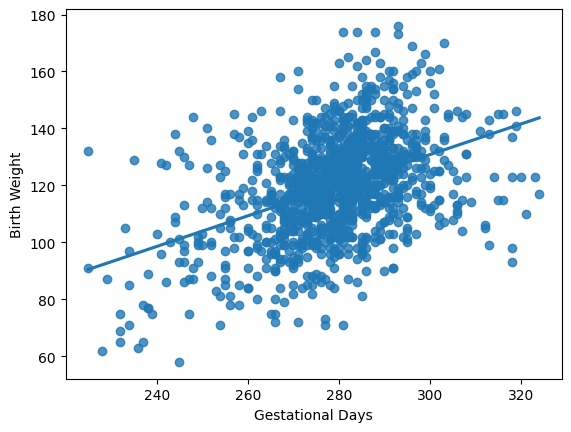

In [8]:
sns.regplot(x=births["Gestational Days"], y=births["Birth Weight"], ci=0)

## Prediction at a Given Value of x

In [ ]:
def fit_least_squares(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1*x

In [9]:
it, sl = fit_least_squares(births["Gestational Days"], births["Birth Weight"])

prediction_at_300 = predict(300, it, sl)
prediction_at_300

130.8095167424877

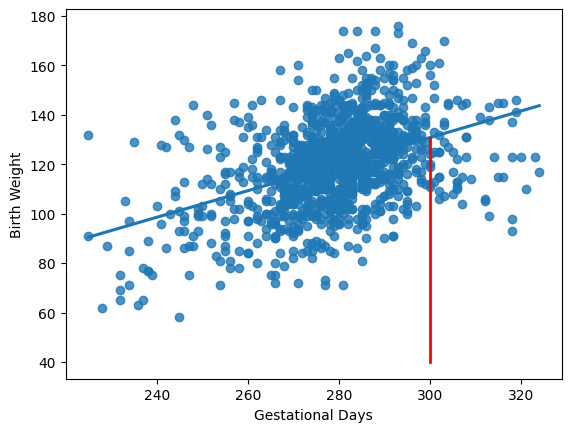

In [10]:
x = 300
sns.regplot(x=births["Gestational Days"], y=births["Birth Weight"], ci=0)
plt.plot([x, x], [40, prediction_at_300], color='red', lw=2);

Predicted y from bootstrap sample was 131.47814744820923
Predicted y from bootstrap sample was 130.31061952947175
Predicted y from bootstrap sample was 130.83532683024757
Predicted y from bootstrap sample was 130.69339350225982
Predicted y from bootstrap sample was 130.4752267998203


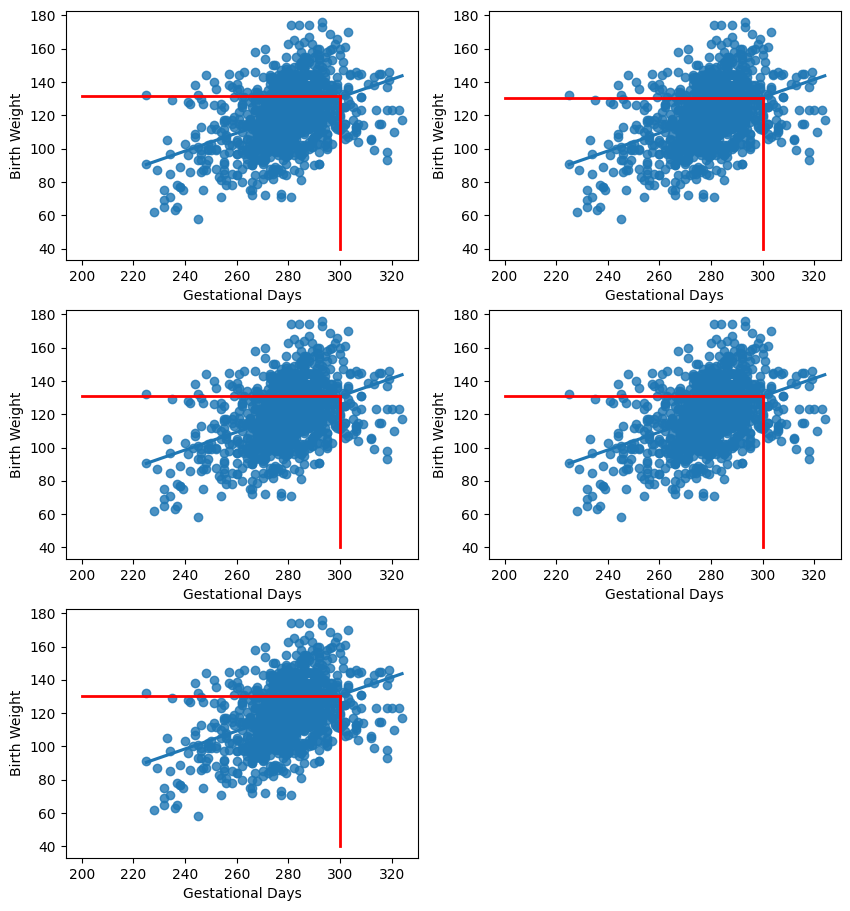

In [11]:

plt.figure(figsize=(10, 11))
plt.subplot(3, 2, 1)



for i in np.arange(1, 6, 1):
    plt.subplot(3,2,i)
    resample = births.sample(frac=1, replace=True)
    it, sl = fit_least_squares(resample["Gestational Days"], resample["Birth Weight"])
    predicted_y = predict(300, it, sl)
    print('Predicted y from bootstrap sample was', predicted_y)
    sns.regplot(x=births["Gestational Days"], y=births["Birth Weight"], ci=0)
    plt.plot([x, x], [40, predicted_y], color='red', lw=2);
    plt.plot([200, x], [predicted_y, predicted_y], color='red', lw=2);

## Predictions at 3 different points:

In [12]:
df = pd.DataFrame(columns=['slope','intercept','at 230','at 300','at 320'])


for i in range(10):
    resample = births.sample(frac=1, replace=True)
    b, a = fit_least_squares(resample["Gestational Days"], resample["Birth Weight"])
    df.loc[len(df.index)] = [a, b, a * 230 + b, a * 300 + b, a * 320 + b]



df

,slope,intercept,at 230,at 300,at 320
0,0.519201,-25.920097,93.496049,129.840094,140.224106
1,0.531072,-28.376794,93.769669,130.944680,141.566111
2,0.544696,-32.732732,92.547284,130.675984,141.569898
3,0.581239,-43.833718,89.851245,130.537973,142.162753
4,0.601540,-48.564019,89.790213,131.898023,143.928826
5,0.524155,-27.154085,93.401617,130.092483,140.575587
6,0.589156,-44.013826,91.492038,132.732954,144.516072
7,0.564193,-37.675439,92.089033,131.582567,142.866434
8,0.543360,-31.692804,93.280032,131.315243,142.182446
9,0.537560,-30.043705,93.595126,131.224336,141.975539


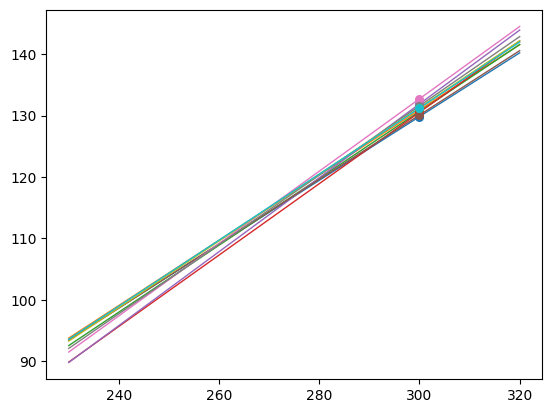

In [13]:
for i in np.arange(df.shape[0]):
    line = df.iloc[i,:]
    plt.plot([230, 320], [line['at 230'], line['at 320']], lw=1)
    plt.scatter(300, line['at 300'], s=30, zorder=3)

In [ ]:
births['Gestational Days'].mean(), births['Birth Weight'].mean()

## Zooming at 300

In [14]:

df2 = pd.DataFrame(columns=['slope','intercept','at 291', 'at 300', 'at 309'])



for i in range(10):
    resample = births.sample(frac=1, replace=True)
    b, a = fit_least_squares(resample["Gestational Days"], resample["Birth Weight"])
    df2.loc[len(df2.index)] = [a, b, a * 291 + b, a * 300 + b, a * 309 + b]
    
df2


,slope,intercept,at 291,at 300,at 309
0,0.573901,-39.661844,127.343469,132.508582,137.673695
1,0.536821,-30.043711,126.171285,131.002676,135.834068
2,0.607788,-50.359175,126.507013,131.977101,137.447189
3,0.550509,-34.084243,126.113846,131.068426,136.023006
4,0.550088,-34.285222,125.790243,130.741030,135.691818
5,0.493661,-18.616469,125.038961,129.481912,133.924864
6,0.528804,-28.189898,125.692052,130.451287,135.210523
7,0.508373,-21.744719,126.191730,130.767084,135.342438
8,0.508274,-22.247438,125.660381,130.234849,134.809318
9,0.538283,-30.384120,126.256349,131.100899,135.945450


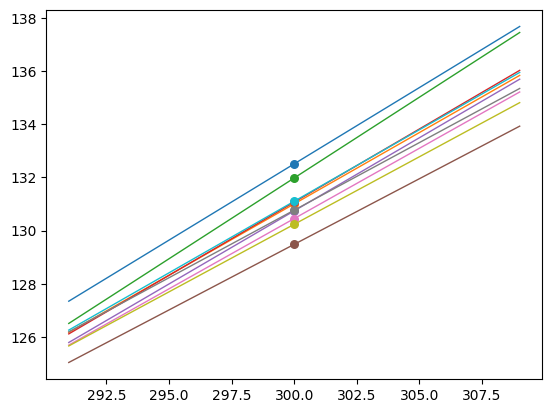

In [15]:
for i in np.arange(df2.shape[0]):
    line = df2.iloc[i,:]
    plt.plot([291, 309], [line['at 291'], line['at 309']], lw=1)
    plt.scatter(300, line['at 300'], s=30, zorder=3)





## Confidence Intervals for Predicted Output (Mean Response)

In [16]:
np.int=np.int_
def bootstrap_prediction(t, x, y, new_x, repetitions=2500):
    """ 
    Makes a 95% confidence interval for the height of the true line at new_x, 
    using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """
    
    
    # Bootstrap the scatter, predict, collect
    predictions = np.array([])
    for i in np.arange(repetitions):
        resample = t.sample(frac=1, replace=True)
        it, sl = fit_least_squares(resample["Gestational Days"], resample["Birth Weight"])
        predicted_y = predict(new_x, it, sl)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = np.percentile(predictions, 2.5)
    right = np.percentile(predictions, 97.5)
    round_left = round(left, 3)
    round_right = round(right, 3)

    # Display results
    plt.hist(predictions, bins=20)
    plt.plot(np.array([left, right]), np.array([0,0]), color='yellow', linewidth=10)
    plt.xlabel('predictions at x='+str(new_x))
    plt.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line at x =', new_x)
    print(round_left, 'to', round_right, '( width =', round(right - left, 3), ')') 
    
    
   

Approximate 95%-confidence interval for height of true line at x = 300
128.916 to 132.695 ( width = 3.779 )


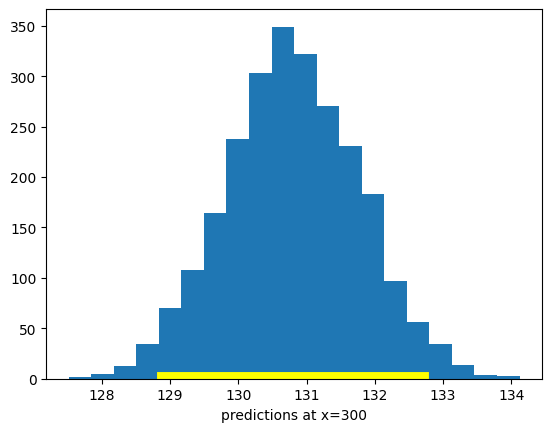

In [17]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

## Predictions at Different Values of x (Demo)

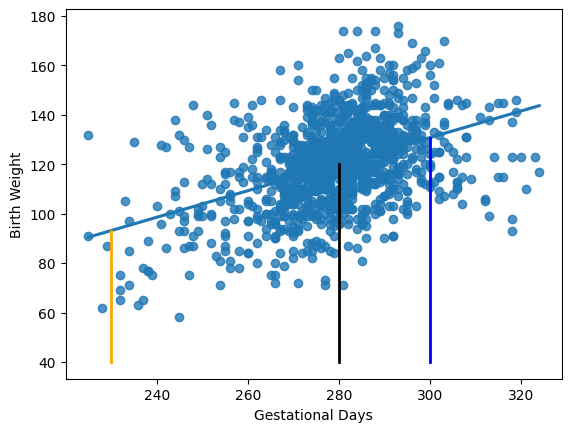

In [18]:
x = 300

sns.regplot(x=births["Gestational Days"], y=births["Birth Weight"], ci=0)
plt.plot([x, x], [40, prediction_at_300], color='blue', lw=2);

it, sl = fit_least_squares(births["Gestational Days"], births["Birth Weight"])

prediction_at_230 = predict(230, it, sl)
plt.plot([230, 230], [40, prediction_at_230], color='orange', lw=2);

prediction_at_280 = predict(280, it, sl)
plt.plot([280, 280], [40, prediction_at_280], color='black', lw=2);

Approximate 95%-confidence interval for height of true line at x = 230
89.247 to 97.349 ( width = 8.101 )


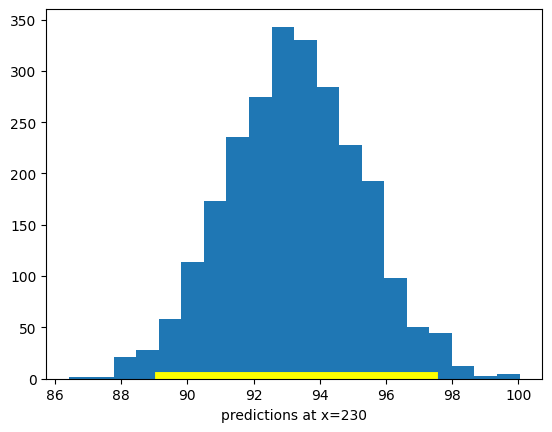

In [19]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 230)

Approximate 95%-confidence interval for height of true line at x = 280
119.068 to 121.021 ( width = 1.953 )


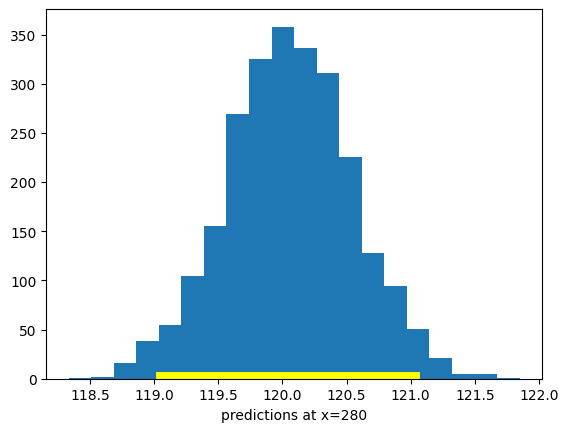

In [20]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

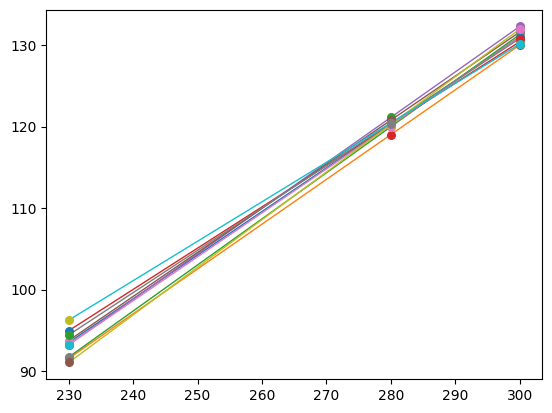

In [21]:
df = pd.DataFrame(columns=['slope','intercept','at 230','at 280','at 300'])


for i in range(10):
    resample = births.sample(frac=1, replace=True)
    b, a = fit_least_squares(resample["Gestational Days"], resample["Birth Weight"])
    df.loc[len(df.index)] = [a, b, a * 230 + b, a * 280 + b, a * 300 + b]



df




for i in np.arange(df.shape[0]):
    line = df.iloc[i,:]
    plt.plot([230, 300], [line['at 230'], line['at 300']], lw=1)
    plt.scatter(280, line['at 280'], s=30, zorder=3)
    plt.scatter(230, line['at 230'], s=30, zorder=3)
    plt.scatter(300, line['at 300'], s=30, zorder=3)
    
    


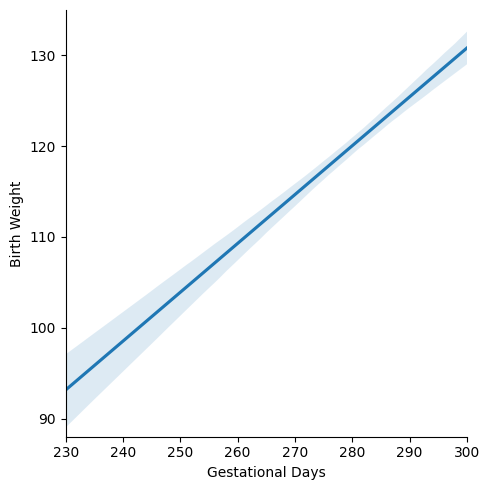

In [22]:
# There's a built-in function to view these confidence interval band


sns.lmplot(data = births, x="Gestational Days", y="Birth Weight", scatter=False, facet_kws={'xlim': (230, 300), 'ylim':(88,135)})